In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff

In [2]:
path = './data/'
data_raw = arff.loadarff(open(path+'xclara.arff','r'))
data = [[x[0],x[1]] for x in data_raw[0]]

In [3]:
data = np.array(data)
f0 = data[:,0]
f1 = data[:,1]

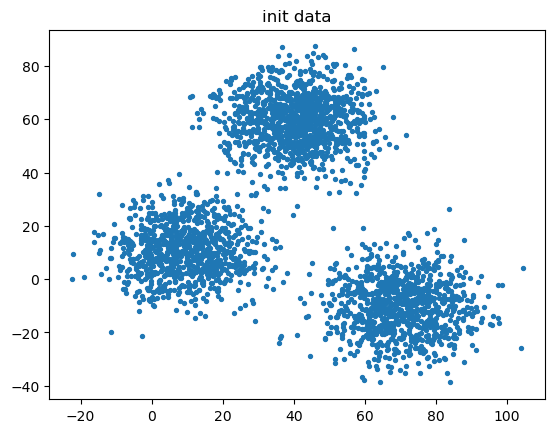

In [4]:
plt.scatter(f0,f1,s=8)
plt.title('init data')
plt.show()

In [5]:
import time
from sklearn import cluster

In [6]:
start_time = time.time()

K = 3
model = cluster.KMeans(n_clusters=K, init='k-means++')
model.fit(data)

finish_time = time.time()
print(f'Fit time : {finish_time - start_time} s')

Fit time : 0.05577564239501953 s


[0 0 0 ... 2 2 2]


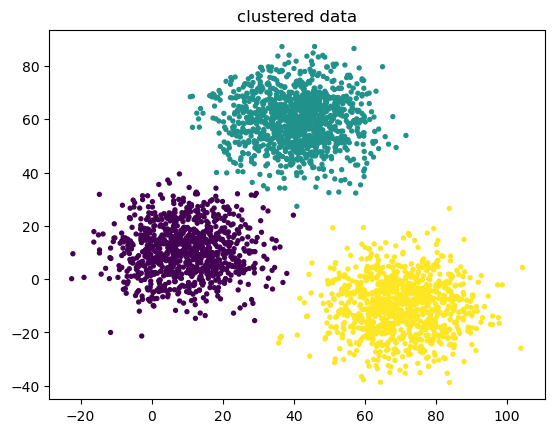

In [7]:
labels = model.labels_
iterations = model.n_iter_
print(labels)

plt.scatter(f0,f1,c=labels,s=8)
plt.title('clustered data')
plt.show()

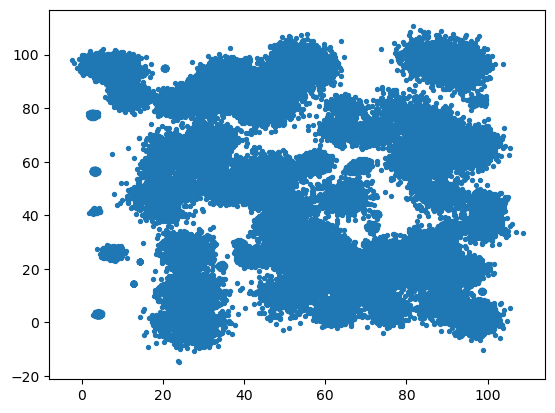

In [8]:
birch_data_raw = arff.loadarff(open(path+'birch-rg3.arff','r'))
birch_data = [[x[0],x[1]] for x in birch_data_raw[0]]
birch_data = np.array(birch_data)
birch_f0 = birch_data[:,0]
birch_f1 = birch_data[:,1]


plt.scatter(birch_f0,birch_f1,s=8)
plt.show()

In [9]:
blobs_data_raw = arff.loadarff(open(path+'blobs.arff','r'))
smile_data = [[x[0],x[1]] for x in smile_data_raw[0]]
blobs_data = np.array(blobs_data)
blobs_f0 = blobs_data[:,0]
blobs_f1 = blobs_data[:,1]


plt.scatter(blobs_f0,blobs_f1,s=8)
plt.show()

NameError: name 'smile_data_raw' is not defined

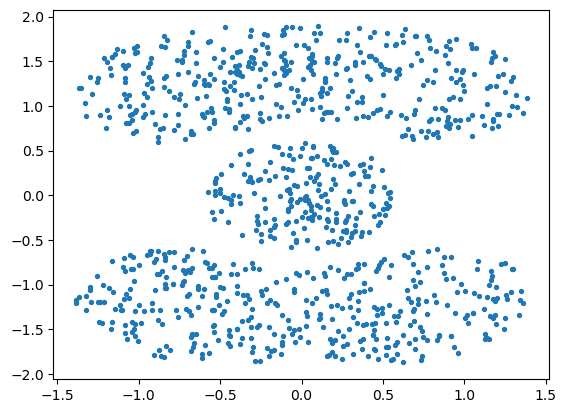

In [ ]:
cassini_data_raw = arff.loadarff(open(path+'cassini.arff','r'))
cassini_data = [[x[0],x[1]] for x in cassini_data_raw[0]]
cassini_data = np.array(cassini_data)
cassini_f0 = cassini_data[:,0]
cassini_f1 = cassini_data[:,1]

plt.scatter(cassini_f0,cassini_f1,s=8)
plt.show()

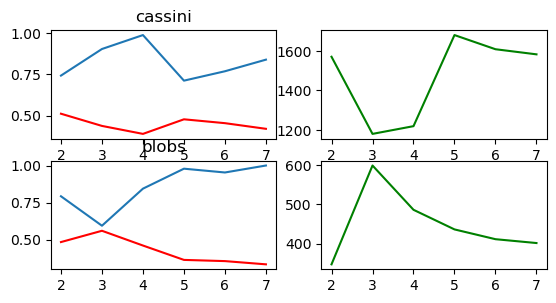

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score, davies_bouldin_score, calinski_harabasz_score

st = time.time()
blobs_scores = np.empty([6,3])
cassini_scores = np.empty([6,3])
birch_scores = np.empty([6,3])

for k in range(2,8) :
    model = cluster.KMeans(n_clusters=k,init='k-means++')
    model.fit(cassini_data)
    sil = silhouette_score(cassini_data, model.labels_)
    db = davies_bouldin_score(cassini_data, model.labels_)
    ch = calinski_harabasz_score(cassini_data, model.labels_) 

    cassini_scores[k-2] = [sil,db,ch]

plt.subplot(3,2,1)
plt.xticks(np.arange(2,8))
plt.title('cassini')
plt.plot(np.arange(2,8),cassini_scores[:,0],'r')
plt.plot(np.arange(2,8),cassini_scores[:,1])
plt.subplot(3,2,2)
plt.xticks(np.arange(2,8))
plt.plot(np.arange(2,8),cassini_scores[:,2],'g')

for k in range(2,8) :
    model = cluster.KMeans(n_clusters=k,init='k-means++')
    model.fit(blobs_data)
    sil = silhouette_score(blobs_data, model.labels_)
    db = davies_bouldin_score(blobs_data, model.labels_)
    ch = calinski_harabasz_score(blobs_data, model.labels_) 
    
    blobs_scores[k-2] = [sil,db,ch]

plt.subplot(3,2,3)
plt.xticks(np.arange(2,8))
plt.title('blobs')
plt.plot(np.arange(2,8),blobs_scores[:,0],'r')
plt.plot(np.arange(2,8),blobs_scores[:,1])
plt.subplot(3,2,4)
plt.xticks(np.arange(2,8))
plt.plot(np.arange(2,8),blobs_scores[:,2],'g')

plt.show()



In [ ]:
import kmedoids
from sklearn import metrics

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances                         

Loss with FasterPAM :  185.68170185178224


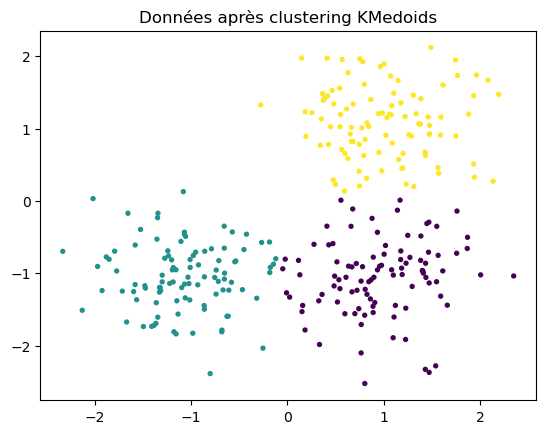

In [ ]:
starting_time = time.time()
k=3
distmatrix = euclidean_distances(blobs_data)
fp = kmedoids.fasterpam(distmatrix, k)


final_time = time.time()
iter=fp.n_iter
labels_kmeds = fp.labels
print("Loss with FasterPAM : " , fp.loss)


plt.scatter(blobs_f0, blobs_f1, c = labels_kmeds, s=8)
plt.title("Données après clustering KMedoids")
plt.show()


In [ ]:
silhouette_score(blobs_data, labels_kmeds)

0.5585986465111633

[0.4702186656580182, 0.5585986465111633, 0.46182483985714395, 0.38904603761009054, 0.32148719806193604, 0.3297232263741944]


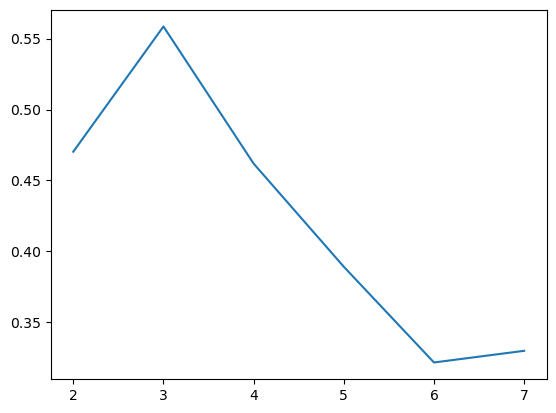

In [ ]:
scores = []
for k in range(2,8) :
    model = kmedoids.fasterpam(distmatrix, k)
    labels = model.labels
    scores.append(silhouette_score(blobs_data, labels))

print(scores)
plt.plot(np.arange(2,8),scores)
plt.show()

    

## Partie 3 - Clustering agglomératif

 Dendrogramme ’ single ’ donnees initiales 


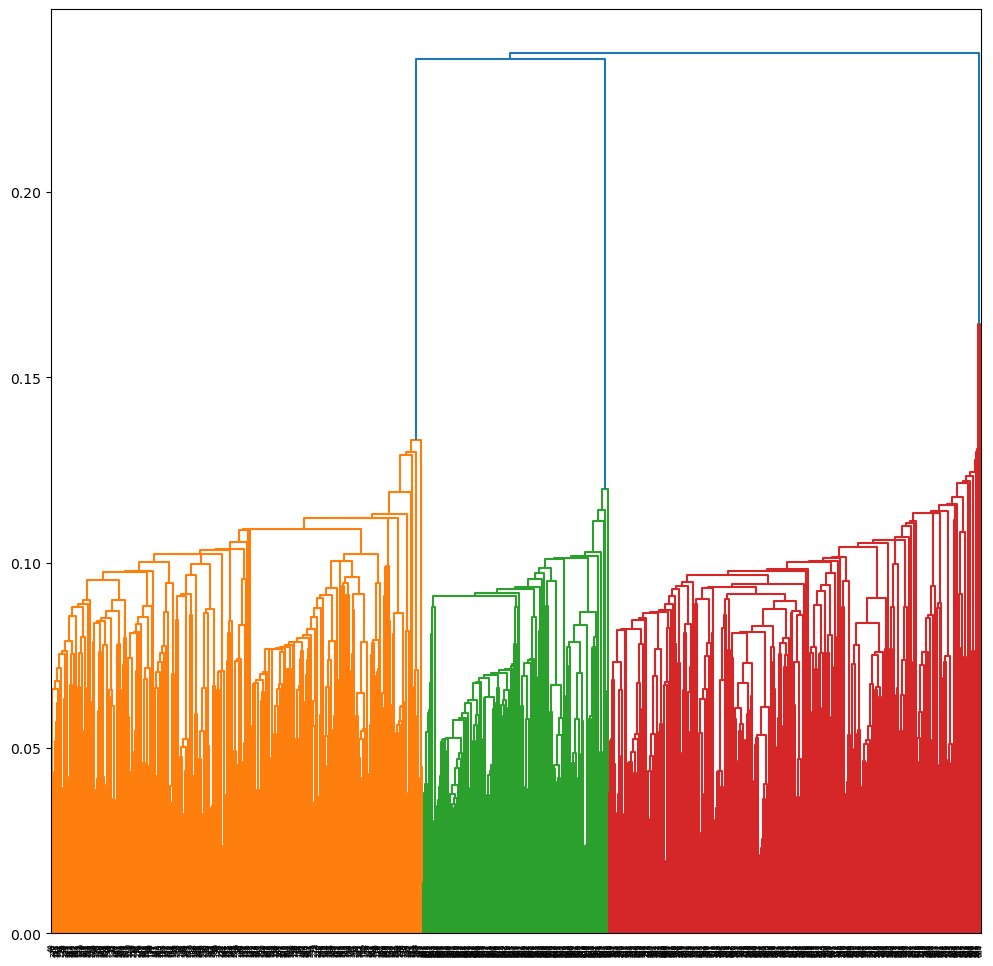

In [ ]:
import scipy.cluster.hierarchy as shc
# Donnees dans datanp
print(" Dendrogramme ’ single ’ donnees initiales ")
linked_mat = shc.linkage(cassini_data, 'single')
plt.figure(figsize=(12, 12))
shc.dendrogram(linked_mat,
                 orientation='top',
                 distance_sort= 'descending',
                 show_leaf_counts=False)
plt.show()


300


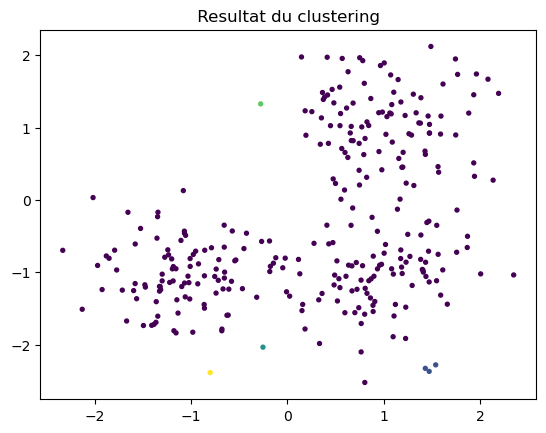

nb clusters =  5  , nb feuilles =  300 runtime =  1.89  ms 


In [ ]:
# set di stance_threshold ( 0 ensures we compute the full tree )
tps1 = time.time()
model = cluster.AgglomerativeClustering(distance_threshold=0.45, linkage= 'single', n_clusters=None)
model = model.fit(blobs_data)
tps2 = time.time()
labels = model.labels_
print(len(labels))
k = model.n_clusters_
leaves = model.n_leaves_
# Affichage clustering

f0 =blobs_data[:,0]
f1 =blobs_data[:,1]

plt.scatter(f0, f1, c=labels, s=8)
plt.title(" Resultat du clustering ")
plt.show()
print("nb clusters = ", k, " , nb feuilles = ", leaves, "runtime = ", round((tps2 - tps1) * 1000, 2), " ms ")

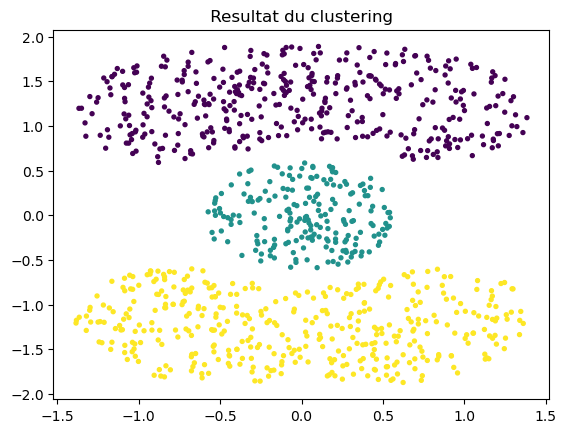

nb clusters =  3  , nb feuilles =  1000 runtime =  6.25  ms 


In [ ]:
# set the number of clusters
k = 3
tps1 = time.time()
model = cluster.AgglomerativeClustering(linkage= 'single', n_clusters=k)
model = model.fit(cassini_data)
tps2 = time.time()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_

f0 =cassini_data[:,0]
f1 =cassini_data[:,1]

plt.scatter(f0, f1, c=labels, s=8)
plt.title(" Resultat du clustering ")
plt.show()
print("nb clusters = ", k, " , nb feuilles = ", leaves, "runtime = ", round((tps2 - tps1) * 1000, 2), " ms ")

note : this one doesn't perform well on blobs_data (very sensitive to outliers)

In [ ]:
data_raw = arff.loadarff(open(path+'smile1.arff','r'))
smile_data = np.array([[x[0],x[1]] for x in data_raw[0]])

data_raw = arff.loadarff(open(path+'donut2.arff','r'))
donut_data = np.array([[x[0],x[1]] for x in data_raw[0]])

smile_f0 =smile_data[:,0]
smile_f1 =smile_data[:,1]


donut_f0 =donut_data[:,0]
donut_f1 =donut_data[:,1]

In [ ]:
scores = np.empty((1,3))
x = np.arange(0.0001,0.01,0.0001)
for dist in x :
    tps1 = time.time()
    model = cluster.AgglomerativeClustering(linkage= 'single', distance_threshold=dist, n_clusters=None)
    model = model.fit(smile_data)
    tps2 = time.time()
    labels = model.labels_

    sil = silhouette_score(smile_data,labels)
    db = davies_bouldin_score(smile_data,labels)
    cs = calinski_harabasz_score(smile_data,labels)
    scores = np.vstack((scores,[sil,db,cs]))
scores = scores[1:,:]

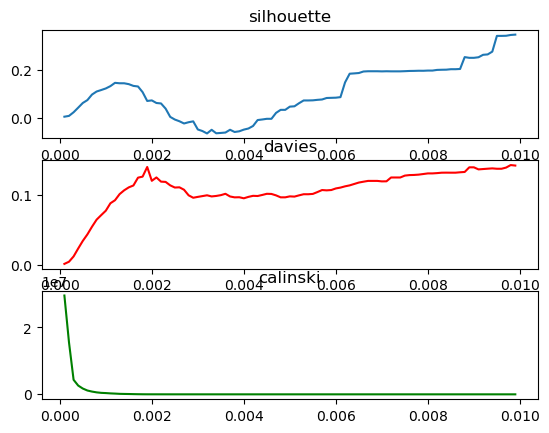

In [ ]:
plt.subplot(3,1,1)
plt.title('silhouette')
plt.plot(x,scores[:,0])
plt.subplot(3,1,2)
plt.title('davies')
plt.plot(x,scores[:,1],'r')
plt.subplot(3,1,3)
plt.title('calinski')
plt.plot(x,scores[:,2],'g')


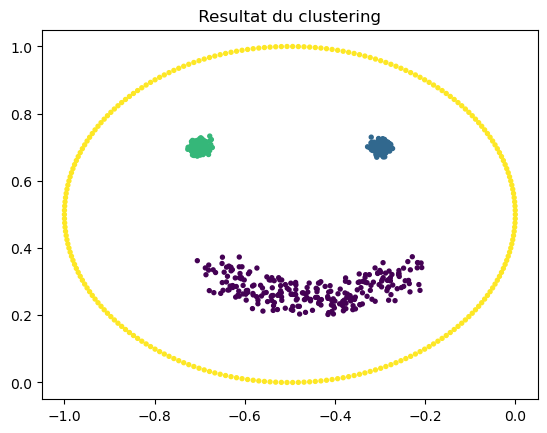

nb clusters =  4


In [ ]:
model_single = cluster.AgglomerativeClustering(linkage= 'single', n_clusters=4)
model_single = model_single.fit(smile_data)
labels = model_single.labels_

plt.scatter(smile_f0, smile_f1, c=labels, s=8)
plt.title(" Resultat du clustering ")
plt.show()
print("nb clusters = ", 4)

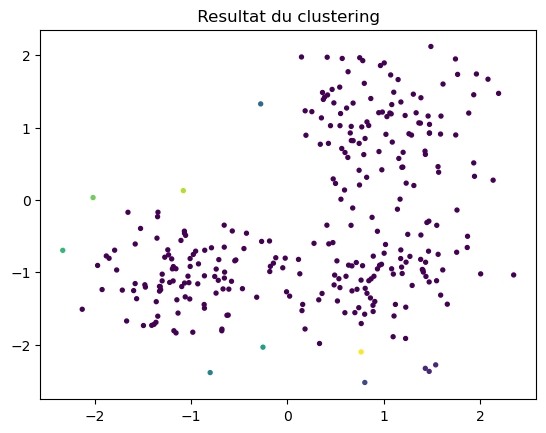

nb clusters =  10


In [ ]:
model_single = cluster.AgglomerativeClustering(linkage= 'single', n_clusters=10)
model_single = model_single.fit(blobs_data)
labels = model_single.labels_

plt.scatter(blobs_f0, blobs_f1, c=labels, s=8)
plt.title(" Resultat du clustering ")
plt.show()
print("nb clusters = ", 10)

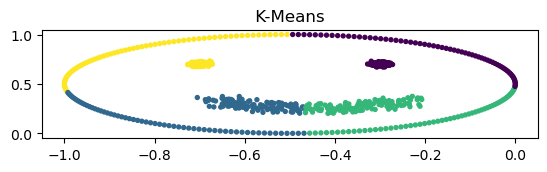

nb clusters =  4


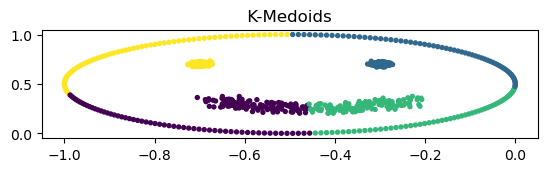

nb clusters =  4


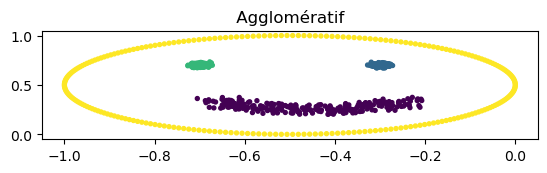

nb clusters =  4


In [ ]:
k=4

model_kmeans = cluster.KMeans(k,init='k-means++')
model_kmeans = model_kmeans.fit(smile_data)
labels = model_kmeans.labels_

plt.subplot(3,1,1)
plt.scatter(smile_f0, smile_f1, c=labels, s=8)
plt.title(" K-Means ")
plt.show()
print("nb clusters = ", k)

distmatrix = euclidean_distances(smile_data)
model_kmedoid = kmedoids.fasterpam(distmatrix, k)
labels = model_kmedoid.labels

plt.subplot(3,1,2)
plt.scatter(smile_f0, smile_f1, c=labels, s=8)
plt.title(" K-Medoids ")
plt.show()
print("nb clusters = ", k)

model_single = cluster.AgglomerativeClustering(linkage= 'single', n_clusters=k)
model_single = model_single.fit(smile_data)
labels = model_single.labels_

plt.subplot(3,1,3)
plt.scatter(smile_f0, smile_f1, c=labels, s=8)
plt.title(" Agglomératif ")
plt.show()
print("nb clusters = ", k)

4 Clustering DBSCAN et HDBSCAN

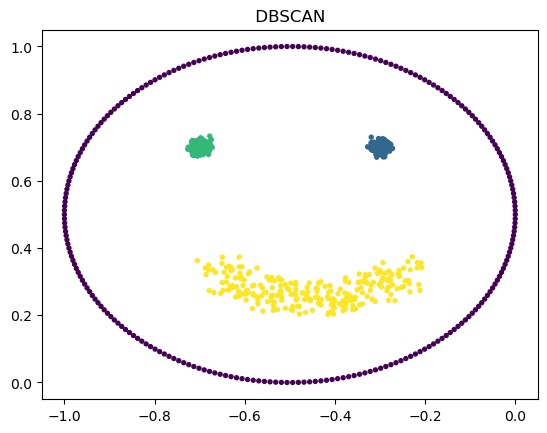

In [ ]:
model = cluster.DBSCAN(eps=0.05, min_samples=10)
model = model.fit(smile_data)
labels = model.labels_

plt.scatter(smile_f0, smile_f1, c=labels, s=8)
plt.title(" DBSCAN ")
plt.show()

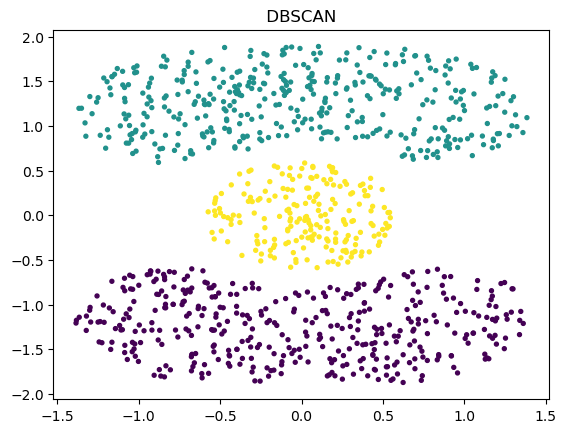

In [ ]:
model = cluster.DBSCAN(eps=0.2, min_samples=2)
model = model.fit(cassini_data)
labels = model.labels_

plt.scatter(f0, f1, c=labels, s=8)
plt.title(" DBSCAN ")
plt.show()

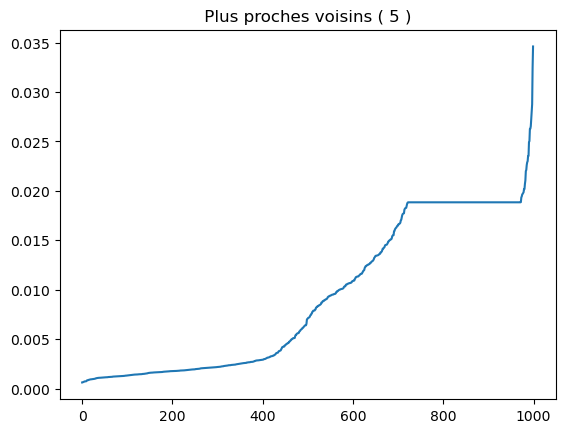

In [ ]:
# Distances k plus proches voisins
# Donnees dans X
from sklearn.neighbors import NearestNeighbors

k = 5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(smile_data)
distances, indices = neigh.kneighbors(smile_data)
# retirer le point " origine "
newDistances = np.asarray([np.average(distances[i][1:]) for i in range(0,
                                                                       distances.shape[0])])
trie = np.sort(newDistances)
plt.title(" Plus proches voisins ( 5 ) ")
plt.plot(trie)
plt.show()


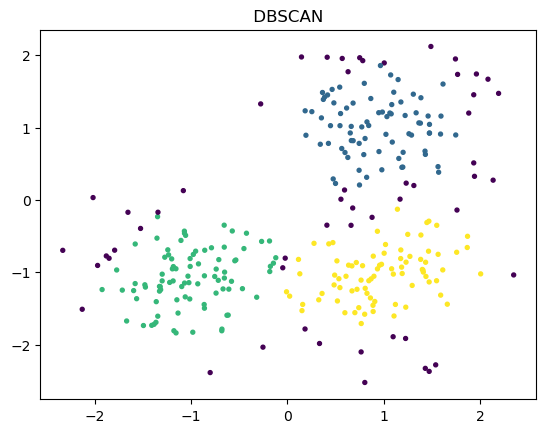

In [ ]:
blobs_model = cluster.DBSCAN(eps=0.4, min_samples=15)
blobs_model = blobs_model.fit(blobs_data)
labels = blobs_model.labels_

plt.scatter(blobs_f0, blobs_f1, c=labels, s=8)
plt.title(" DBSCAN ")
plt.show()

c nul

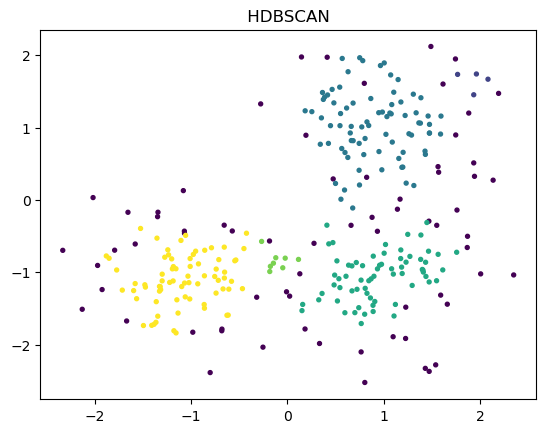

In [ ]:
import hdbscan

blobs_model = hdbscan.HDBSCAN(min_cluster_size=4)
labels = blobs_model.fit_predict(blobs_data)

plt.scatter(blobs_f0, blobs_f1, c=labels, s=8)
plt.title(" HDBSCAN ")
plt.show()